In [1]:
%matplotlib inline

In [2]:
%display latex

## Implementing SAGE Manifolds in Jupyter Notebook

## Mathjax custom macros

$ \newcommand{\opexpect}[3]{\langle #1 \vert #2 \vert #3 \rangle} $
$ \newcommand{\rarrow}{\rightarrow} $
$ \newcommand{\bra}{\langle} $
$ \newcommand{\ket}{\rangle} $

$ \newcommand{\up}{\uparrow} $
$ \newcommand{\down}{\downarrow} $

$ \newcommand{\mb}[1]{\mathbf{#1}} $
$ \newcommand{\mc}[1]{\mathcal{#1}} $
$ \newcommand{\mbb}[1]{\mathbb{#1}} $
$ \newcommand{\mf}[1]{\mathfrak{#1}} $

$ \newcommand{\vect}[1]{\boldsymbol{\mathrm{#1}}} $
$ \newcommand{\expect}[1]{\langle #1\rangle} $

$ \newcommand{\innerp}[2]{\langle #1 \vert #2 \rangle} $
$ \newcommand{\fullbra}[1]{\langle #1 \vert} $
$ \newcommand{\fullket}[1]{\vert #1 \rangle} $
$ \newcommand{\supersc}[1]{^{\text{#1}}} $
$ \newcommand{\subsc}[1]{_{\text{#1}}} $
$ \newcommand{\sltwoc}{SL(2,\mathbb{C})} $
$ \newcommand{\sltwoz}{SL(2,\mathbb{Z})} $

$ \newcommand{\utilde}[1]{\underset{\sim}{#1}} $

### Schwarzschild Black Hole

Reference: [Schwarzschild](http://sagemanifolds.obspm.fr/examples/html/SM_sphere_S2.html)

In [3]:
M2 = Manifold(4,'M2'); M2

4-dimensional manifold 'M2'

In [4]:
chart.<t,r,theta,phi> = M2.chart(); chart

chart (M2, (t, r, theta, phi))

In [5]:

g2 = M2.lorentz_metric('g2'); g2

Lorentzian metric 'g2' on the 4-dimensional manifold 'M2'

#### Schwarzschild Parameter Definitions

Schwarzschild Radius: $r_s$
Black hole mass: $M$
Newton's Constant: $G_N$
Speed of light: $c$

In [6]:
var('M,G_N,r_s,c')

(M, G_N, r_s, c)

#### Define Metric Elements

In [7]:
g2[0,0] = (1 - r_s/r)*(c**2)
g2[1,1] = 1/(1-r_s/r)
g2[2,2] = r**2
g2[3,3] = r**2 * (sin(theta))^2
g2.display()

g2 = (c^2*r - c^2*r_s)/r dt*dt + r/(r - r_s) dr*dr + r^2 dtheta*dtheta + r^2*sin(theta)^2 dphi*dphi

#### Christoffel Connection

In [8]:
christoffels = g2.christoffel_symbols();
christoffels

3-indices components w.r.t. coordinate frame (M2, (d/dt,d/dr,d/dtheta,d/dphi)), with symmetry on the index positions (1, 2)

In [9]:
christoffels.display('\Gamma')

\Gamma_001 = 1/2*r_s/(r^2 - r*r_s) 
\Gamma_010 = 1/2*r_s/(r^2 - r*r_s) 
\Gamma_100 = -1/2*(c^2*r*r_s - c^2*r_s^2)/r^3 
\Gamma_111 = -1/2*r_s/(r^2 - r*r_s) 
\Gamma_122 = -r + r_s 
\Gamma_133 = -(r - r_s)*sin(theta)^2 
\Gamma_212 = 1/r 
\Gamma_221 = 1/r 
\Gamma_233 = -cos(theta)*sin(theta) 
\Gamma_313 = 1/r 
\Gamma_323 = cos(theta)/sin(theta) 
\Gamma_331 = 1/r 
\Gamma_332 = cos(theta)/sin(theta)

#### Taking traces

In [10]:
christoffels.trace(0,1)

1-index components w.r.t. coordinate frame (M2, (d/dt,d/dr,d/dtheta,d/dphi))

#### Riemann Tensor

In [11]:
 riemann = g2.riemann()

In [12]:
riemann

tensor field 'Riem(g2)' of type (1,3) on the 4-dimensional manifold 'M2'

In [13]:
type(riemann)

<class 'sage.geometry.manifolds.tensorfield.TensorFieldFreeModule_with_category.element_class'>

In [14]:
riemann.display()

Riem(g2) = r_s/(r^3 - r^2*r_s) d/dt*dr*dt*dr - r_s/(r^3 - r^2*r_s) d/dt*dr*dr*dt - 1/2*r_s/r d/dt*dtheta*dt*dtheta + 1/2*r_s/r d/dt*dtheta*dtheta*dt - 1/2*r_s*sin(theta)^2/r d/dt*dphi*dt*dphi + 1/2*r_s*sin(theta)^2/r d/dt*dphi*dphi*dt - (c^2*r*r_s - c^2*r_s^2)/r^4 d/dr*dt*dt*dr + (c^2*r*r_s - c^2*r_s^2)/r^4 d/dr*dt*dr*dt - 1/2*r_s/r d/dr*dtheta*dr*dtheta + 1/2*r_s/r d/dr*dtheta*dtheta*dr - 1/2*r_s*sin(theta)^2/r d/dr*dphi*dr*dphi + 1/2*r_s*sin(theta)^2/r d/dr*dphi*dphi*dr + 1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 d/dtheta*dt*dt*dtheta - 1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 d/dtheta*dt*dtheta*dt + 1/2*r_s/(r^3 - r^2*r_s) d/dtheta*dr*dr*dtheta - 1/2*r_s/(r^3 - r^2*r_s) d/dtheta*dr*dtheta*dr + r_s*sin(theta)^2/r d/dtheta*dphi*dtheta*dphi - r_s*sin(theta)^2/r d/dtheta*dphi*dphi*dtheta + 1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 d/dphi*dt*dt*dphi - 1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 d/dphi*dt*dphi*dt + 1/2*r_s/(r^3 - r^2*r_s) d/dphi*dr*dr*dphi - 1/2*r_s/(r^3 - r^2*r_s) d/dphi*dr*dphi*dr - r_s/r d/dphi*dtheta*dtheta*dphi + r_s/r d/dphi*dtheta*dphi*dtheta

In [27]:
riemann_comp = riemann.components()
riemann_comp.display('R')

R_0101 = r_s/(r^3 - r^2*r_s) 
R_0110 = -r_s/(r^3 - r^2*r_s) 
R_0202 = -1/2*r_s/r 
R_0220 = 1/2*r_s/r 
R_0303 = -1/2*r_s*sin(theta)^2/r 
R_0330 = 1/2*r_s*sin(theta)^2/r 
R_1001 = -(c^2*r*r_s - c^2*r_s^2)/r^4 
R_1010 = (c^2*r*r_s - c^2*r_s^2)/r^4 
R_1212 = -1/2*r_s/r 
R_1221 = 1/2*r_s/r 
R_1313 = -1/2*r_s*sin(theta)^2/r 
R_1331 = 1/2*r_s*sin(theta)^2/r 
R_2002 = 1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 
R_2020 = -1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 
R_2112 = 1/2*r_s/(r^3 - r^2*r_s) 
R_2121 = -1/2*r_s/(r^3 - r^2*r_s) 
R_2323 = r_s*sin(theta)^2/r 
R_2332 = -r_s*sin(theta)^2/r 
R_3003 = -1/2*c^2*r_s*(r_s/r - 1)/r^3 
R_3030 = -1/2*(c^2*r*r_s - c^2*r_s^2)/r^4 
R_3113 = 1/2*r_s/(r^3 - r^2*r_s) 
R_3131 = -1/2*r_s/(r^3 - r^2*r_s) 
R_3223 = -r_s/r 
R_3232 = r_s/r

In [24]:
riemann[3,0,0,3].expand().collect(c^2)

1/2*c^2*(r_s/r^3 - r_s^2/r^4)

In [25]:
riemann[3,0,0,3].collect_common_factors()

-1/2*c^2*r_s*(r_s/r - 1)/r^3

#### Ricci Tensor

In [16]:
Ricci = g2.ricci()
Ricci.display()

Ric(g2) = 0

In [17]:
ricci_comp = Ricci.components()
ricci_comp.display('Ricci')

In [20]:
type(ricci)

<class 'sage.geometry.manifolds.tensorfield.TensorFieldFreeModule_with_category.element_class'>

#### Ricci Scalar

In [18]:
ricci_scalar = g2.ricci_scalar()
ricci_scalar

scalar field 'r(g2)' on the 4-dimensional manifold 'M2'

### Vector Fields

In [31]:
u = M2.vector_field('u')
u

vector field 'u' on the 4-dimensional manifold 'M2'

In [33]:
u[0],u[1],u[2],u[3] = 1,1,1,1
u.display()

u = d/dt + d/dr + d/dtheta + d/dphi

#### Raising, Lowering Indices

In [37]:
u2 = g2.contract(u)
u2

1-form on the 4-dimensional manifold 'M2'

In [38]:
u2.display()

(c^2*r - c^2*r_s)/r dt + r/(r - r_s) dr + r^2 dtheta + r^2*sin(theta)^2 dphi

#### Two Ways of Finding Norm of Vector Field

In [42]:
norm_u = u.contract(u2)
norm_u

scalar field on the 4-dimensional manifold 'M2'

In [44]:
norm_u.display()

M2 --> R
(t, r, theta, phi) |--> (r^4 + c^2*r_s^2 + (c^2 + 1)*r^2 + (r^4 - r^3*r_s)*sin(theta)^2 - (2*c^2*r + r^3)*r_s)/(r^2 - r*r_s)

In [45]:
norm_u2 = g2(u,u)
norm_u2.display()

g2(u,u): M2 --> R
   (t, r, theta, phi) |--> (r^4 + c^2*r_s^2 + (c^2 + 1)*r^2 + (r^4 - r^3*r_s)*sin(theta)^2 - (2*c^2*r + r^3)*r_s)/(r^2 - r*r_s)

In [59]:
norm_u2.function_chart().expand().collect(r).collect(r^3)

r^3*(sin(theta)^2/(r - r_s) + 1/(r - r_s)) - (r_s*sin(theta)^2/(r - r_s) + r_s/(r - r_s))*r^2 + (c^2/(r - r_s) + 1/(r - r_s))*r - 2*c^2*r_s/(r - r_s) + c^2*r_s^2/((r - r_s)*r)

### Vector Frames & Affine Connections

Reference: [Affine Connections](http://localhost:8080/doc/live/reference/manifolds/sage/geometry/manifolds/connection.html), [Vector Frames](http://localhost:8080/doc/live/reference/manifolds/sage/geometry/manifolds/vectorframe.html)

In [92]:
M3 = Manifold(3,'M3')
chart.<x,y,z> = M3.chart()

In [93]:
triad = M3.vector_frame('e')
triad

vector frame (M3, (e_0,e_1,e_2))

In [94]:
M3.default_frame()

coordinate frame (M3, (d/dx,d/dy,d/dz))

In [95]:
M3.frames()

[coordinate frame (M3, (d/dx,d/dy,d/dz)), vector frame (M3, (e_0,e_1,e_2))]

In [98]:
type(triad[0])

<class 'sage.geometry.manifolds.vectorfield.VectorFieldFreeModule_with_category.element_class'>

In [99]:
e0 = triad[0]

In [104]:
e0.pick_a_basis()

vector frame (M3, (e_0,e_1,e_2))

In [106]:
M3.set_default_frame(triad)

In [107]:
e0.display()

e_0 = e_0

In [110]:
e0.components()

1-index components w.r.t. vector frame (M3, (e_0,e_1,e_2))

In [114]:
print(e0)

vector field 'e_0' on the 3-dimensional manifold 'M3'


In [117]:
struct_coef = triad.structure_coef()

In [119]:
struct_coef.display('C')

In [121]:
affineC = M3.aff_connection('nabla',r'\nabla')
affineC

affine connection 'nabla' on the 3-dimensional manifold 'M3'

#### Local Tetrad for Schwarzschild

Reference: [Catalog of Spacetimes](http://arxiv.org/abs/arxiv:0904.4184)

\begin{align}
\mb{e}_t & = \left(\frac{1}{c\sqrt{1 - r_s/r}} \partial_t,0,0,0\right) \\
\mb{e}_r & = \left(0, \sqrt{1-\frac{r}{r_s}}\partial_r, 0, 0 \right) \\
\mb{e}_\theta & = \left(0,0, \frac{1}{r}\partial_\theta,0 \right)\\
\mb{e}_\phi & = \left(0,0,0, \frac{1}{r\sin\theta}\partial_\phi\right)
\end{align}

### Stress-Energy Tensor

#### Define Observer Vector Field

In [66]:
vobs = M2.vector_field('v')
var('v_t v_r v_theta v_phi')
vobs[:] = [v_t,v_r,v_theta,v_phi]
vobs.display()

v = v_t d/dt + v_r d/dr + v_theta d/dtheta + v_phi d/dphi

#### Define Minskowski Metric

In [68]:
gmink = M2.lorentz_metric('g')
gmink[0,0] = -c^2
gmink[1,1] = gmink[2,2] = gmink[3,3] = 1
gmink.display()

g = -c^2 dt*dt + dr*dr + dtheta*dtheta + dphi*dphi

In [70]:
vobs_form = vobs.down(gmink)
vobs_form.display()

-c^2*v_t dt + v_r dr + v_theta dtheta + v_phi dphi

In [71]:
norm_vobs = vobs.contract(vobs_form)
norm_vobs.display()

M2 --> R
(t, r, theta, phi) |--> -c^2*v_t^2 + v_phi^2 + v_r^2 + v_theta^2

#### Define Stress-Energy Tensor for Ideal Fluid

In [72]:
# variables for fluid density and pressure
var('rho p')

(rho, p)

In [73]:
T = (rho + p/c^2)*(vobs_form*vobs_form) + p*gmink

In [74]:
T.set_name('T')
print(T)

field of symmetric bilinear forms 'T' on the 4-dimensional manifold 'M2'


In [75]:
T.display()

T = (-c^2*p + (c^4*rho + c^2*p)*v_t^2) dt*dt - (c^2*rho + p)*v_r*v_t dt*dr - (c^2*rho + p)*v_t*v_theta dt*dtheta - (c^2*rho + p)*v_phi*v_t dt*dphi - (c^2*rho + p)*v_r*v_t dr*dt + (c^2*p + (c^2*rho + p)*v_r^2)/c^2 dr*dr + (c^2*rho + p)*v_r*v_theta/c^2 dr*dtheta + (c^2*rho + p)*v_phi*v_r/c^2 dr*dphi - (c^2*rho + p)*v_t*v_theta dtheta*dt + (c^2*rho + p)*v_r*v_theta/c^2 dtheta*dr + (c^2*p + (c^2*rho + p)*v_theta^2)/c^2 dtheta*dtheta + (c^2*rho + p)*v_phi*v_theta/c^2 dtheta*dphi - (c^2*rho + p)*v_phi*v_t dphi*dt + (c^2*rho + p)*v_phi*v_r/c^2 dphi*dr + (c^2*rho + p)*v_phi*v_theta/c^2 dphi*dtheta + (c^2*p + (c^2*rho + p)*v_phi^2)/c^2 dphi*dphi

In [80]:
assume(c == 1)

In [83]:
T.display()

T = (-c^2*p + (c^4*rho + c^2*p)*v_t^2) dt*dt - (c^2*rho + p)*v_r*v_t dt*dr - (c^2*rho + p)*v_t*v_theta dt*dtheta - (c^2*rho + p)*v_phi*v_t dt*dphi - (c^2*rho + p)*v_r*v_t dr*dt + (c^2*p + (c^2*rho + p)*v_r^2)/c^2 dr*dr + (c^2*rho + p)*v_r*v_theta/c^2 dr*dtheta + (c^2*rho + p)*v_phi*v_r/c^2 dr*dphi - (c^2*rho + p)*v_t*v_theta dtheta*dt + (c^2*rho + p)*v_r*v_theta/c^2 dtheta*dr + (c^2*p + (c^2*rho + p)*v_theta^2)/c^2 dtheta*dtheta + (c^2*rho + p)*v_phi*v_theta/c^2 dtheta*dphi - (c^2*rho + p)*v_phi*v_t dphi*dt + (c^2*rho + p)*v_phi*v_r/c^2 dphi*dr + (c^2*rho + p)*v_phi*v_theta/c^2 dphi*dtheta + (c^2*p + (c^2*rho + p)*v_phi^2)/c^2 dphi*dphi

In [89]:
c.subs(c=1)

1

In [91]:
T.display()

T = (-c^2*p + (c^4*rho + c^2*p)*v_t^2) dt*dt - (c^2*rho + p)*v_r*v_t dt*dr - (c^2*rho + p)*v_t*v_theta dt*dtheta - (c^2*rho + p)*v_phi*v_t dt*dphi - (c^2*rho + p)*v_r*v_t dr*dt + (c^2*p + (c^2*rho + p)*v_r^2)/c^2 dr*dr + (c^2*rho + p)*v_r*v_theta/c^2 dr*dtheta + (c^2*rho + p)*v_phi*v_r/c^2 dr*dphi - (c^2*rho + p)*v_t*v_theta dtheta*dt + (c^2*rho + p)*v_r*v_theta/c^2 dtheta*dr + (c^2*p + (c^2*rho + p)*v_theta^2)/c^2 dtheta*dtheta + (c^2*rho + p)*v_phi*v_theta/c^2 dtheta*dphi - (c^2*rho + p)*v_phi*v_t dphi*dt + (c^2*rho + p)*v_phi*v_r/c^2 dphi*dr + (c^2*rho + p)*v_phi*v_theta/c^2 dphi*dtheta + (c^2*p + (c^2*rho + p)*v_phi^2)/c^2 dphi*dphi

In [87]:
c.substitute?

### $S^2$ - The Two Sphere

Reference: [Sphere S2](http://sagemanifolds.obspm.fr/examples/html/SM_sphere_S2.html)

In [4]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2',start_index=1)

In [5]:
print S2

2-dimensional manifold 'S^2'


In [6]:
S2

2-dimensional manifold 'S^2'

In [7]:
isinstance(S2,Parent)

True

In [8]:
S2.category()

Category of sets

**Note:** Latex printing does not seem to be working with sage commands in jupyter.

In [9]:
U = S2.open_subset('U')
print U

open subset 'U' of the 2-dimensional manifold 'S^2'


In [10]:
V = S2.open_subset('V')
print V

open subset 'V' of the 2-dimensional manifold 'S^2'


In [11]:
S2.declare_union(U,V)

In [12]:
stereoN.<x,y> = U.chart()

In [13]:
stereoN

chart (U, (x, y))

In [14]:
stereoS.<xp,yp> = V.chart(r"xp:x' yp:y'")
stereoS

chart (V, (xp, yp))

In [15]:
S2.atlas()

[chart (U, (x, y)), chart (V, (xp, yp))]

In [16]:
stereoN_to_S = stereoN.transition_map(stereoS, (x/(x^2+y^2),y/(x^2+y^2)), intersection_name='W',\
                                      restrictions1= x^2+y^2!=0, restrictions2=xp^2 + yp^2!=0)

In [17]:
stereoN_to_S.display()

xp = x/(x^2 + y^2)
yp = y/(x^2 + y^2)

In [18]:
stereoS_to_N = stereoN_to_S.inverse()

In [19]:
stereoS_to_N.display()

x = xp/(xp^2 + yp^2)
y = yp/(xp^2 + yp^2)

In [20]:
S2.atlas()

[chart (U, (x, y)),
 chart (V, (xp, yp)),
 chart (W, (x, y)),
 chart (W, (xp, yp))]

In [21]:
W = U.intersection(V)

In [22]:
stereoN_W = stereoN.restrict(W)
stereoN_W

chart (W, (x, y))

In [23]:
stereoS_W = stereoS.restrict(W)
stereoS_W

chart (W, (xp, yp))

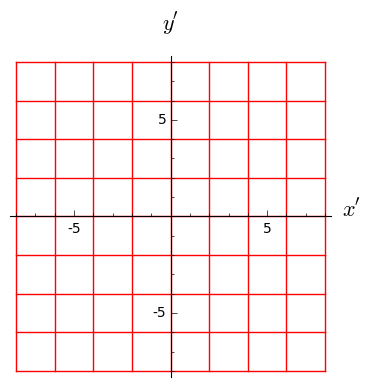

In [24]:
stereoS_W.plot()

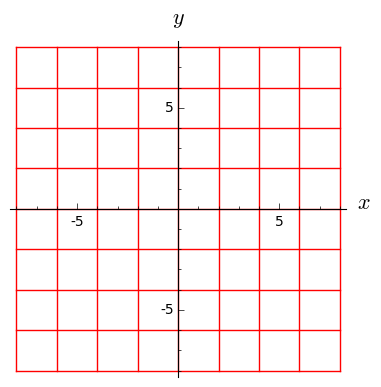

In [25]:
stereoN.plot()